In [3]:
import pandas as pd

boston = pd.read_csv("../../data/Boston.csv").rename({"Unnamed: 0": "ID"}, axis=1).set_index("ID")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [4]:
from ISLP.models import ModelSpec as MS
import statsmodels.api as sm 

all_pred = boston.columns.drop(["crim"])
y = boston["crim"]

R = {}
res = {}

for pred in all_pred:
    X = MS([pred]).fit_transform(boston)
    results = sm.OLS(y, X).fit()

    R[pred] = results.rsquared
    res[pred] = results

sorted_R = sorted(R.items(), key=lambda x: x[1], reverse=True)
sorted_R


[('rad', np.float64(0.39125668674998904)),
 ('tax', np.float64(0.3396142433788123)),
 ('lstat', np.float64(0.20759093253433547)),
 ('nox', np.float64(0.17721718179269375)),
 ('indus', np.float64(0.16531007043075163)),
 ('medv', np.float64(0.15078046904975728)),
 ('dis', np.float64(0.1441493749253987)),
 ('age', np.float64(0.12442145175894648)),
 ('ptratio', np.float64(0.08406843894373617)),
 ('rm', np.float64(0.04806911671608338)),
 ('zn', np.float64(0.04018790803211081)),
 ('chas', np.float64(0.0031238689633057426))]

Among all the quantitative predictors in the Boston dataset,  (Accessibility to radial highways) emerges as the strongest single predictor of crim, with an $R^2$ of approximately 0.39, meaning it explains nearly 39% of the variance in crime rate on its own. This is followed closely by tax, which accounts for about 34% of the variance. Lstat remains the third most predictive variable, explaining around 21%. Other variables like nox, indus, medv, and dis explain between 14% and 18% of the variance, indicating moderate individual predictive strength. Variables such as ptratio, rm, and zn exhibit weaker associations, with $R^2$ values below 0.1. These results suggest that rad and tax capture unique and relatively strong linear relationships with crime rate, while most other predictors offer only marginal improvements when considered in isolation. This underscores the need for multivariate modeling to capture the combined and possibly interacting effects of multiple variables on crime rate.

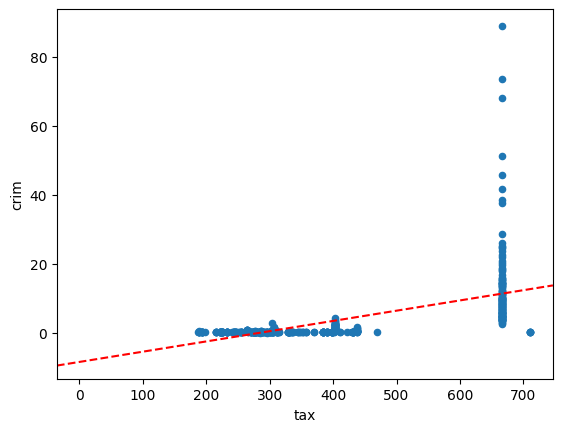

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

X = MS(["tax"]).fit_transform(boston)
results = sm.OLS(y, X).fit()


boston.plot.scatter("tax", "crim", ax=ax);
ax.axline(xy1=(0, results.params.iloc[0]), slope= results.params.iloc[1], c='r', ls='--');


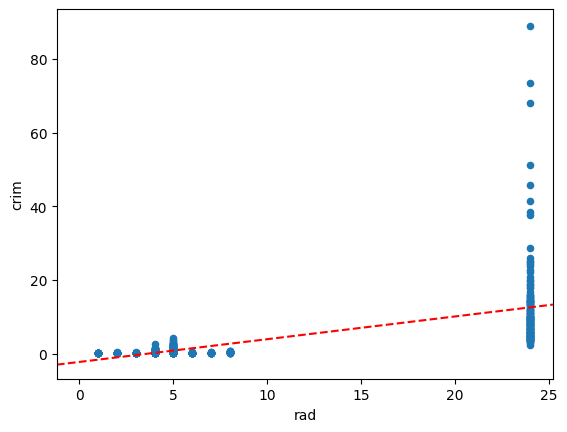

In [6]:
fig, ax = plt.subplots()

X = MS(["rad"]).fit_transform(boston)
results = sm.OLS(y, X).fit()


boston.plot.scatter("rad", "crim", ax=ax);
ax.axline(xy1=(0, results.params.iloc[0]), slope= results.params.iloc[1], c='r', ls='--');

Although the linear regression model yields relatively high $R^2$ values of 0.39 and 0.34 for rad and tax, respectively, visual inspection of the data reveals that the linear model inadequately captures the true nature of these relationships. For tax, crime rates remain consistently low across a broad mid-range of tax values (approximately 200 to 500), suggesting little to no linear association in that region. However, at the extreme high end—particularly at tax levels of 666 and 711—there is a sharp increase in both the level and variability of crime, indicating a threshold effect that the linear model cannot account for. A similar pattern emerges with rad: values below 10 are associated with relatively stable and low crime rates, but there is a sudden and pronounced increase in both crime levels and dispersion at rad = 24.

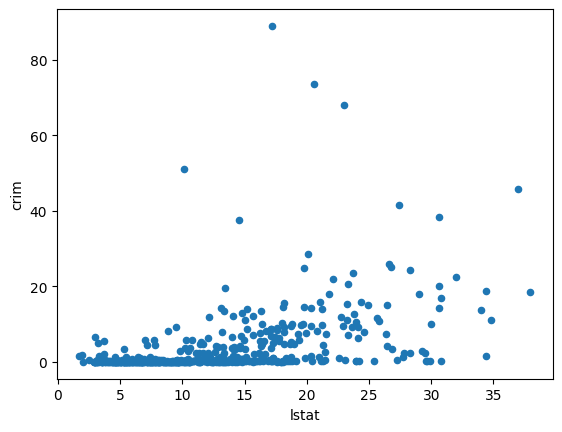

In [7]:
boston.plot.scatter("lstat", "crim");

In [8]:
X = MS(all_pred).fit_transform(boston)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           2.03e-56
Time:                        21:19:40   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the multiple linear regression model, we can reject the null hypothesis $H_0: \beta_j = 0$ for the predictors **zn**, **dis**, **rad**, and **medv**, as their p-values are all below the conventional 0.05 significance level.

In [9]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In the multiple regression model predicting crim, we observe that tax and lstat despite showing moderately strong relationships with crime in univariate regressions, are no longer statistically significant predictors, while rad remains highly significant. This shift can be explained by the multicollinearity present in the dataset.

Specifically, rad is extremely highly correlated with tax ($r = 0.91$), and also substantially correlated with lstat ($r = 0.49$). When all three variables are included in the model, much of the explanatory power that tax and lstat might contribute is already absorbed by rad, which becomes a more dominant predictor. Because multicollinearity inflates the standard errors of the coefficients, it reduces the statistical significance of variables that share variance with stronger or redundant predictors. This is why both tax and lstat, although relevant, show large p-values when included alongside rad, which remains significant due to both its strong individual correlation with crim ($r = 0.63$) and its ability to capture shared variation with other correlated predictors.

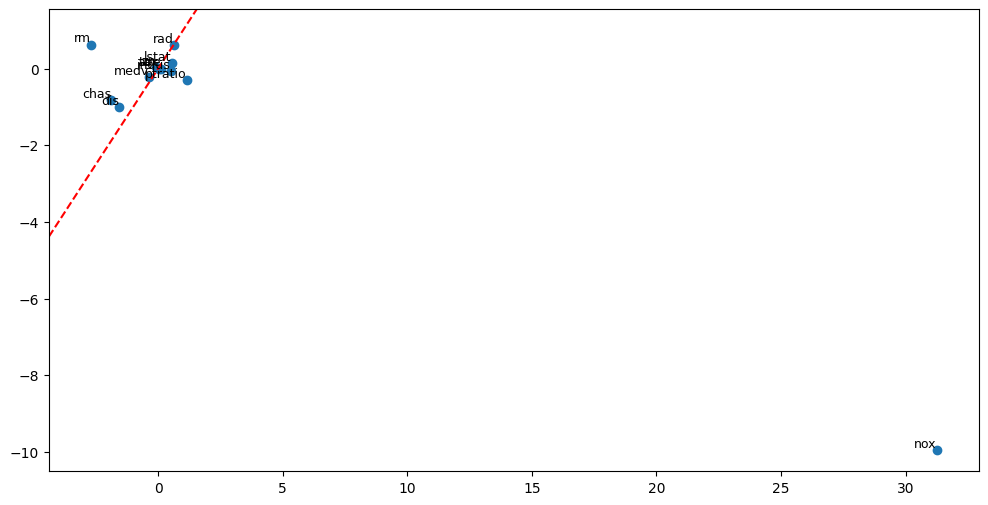

In [10]:
x = []
y = []

for p in all_pred:
    x.append(res[p].params.iloc[1])
    y.append(results.params[p])

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x, y);
ax.axline(xy1=(0,0), xy2=(1, 1), c='r', ls='--');

# Add predictor names as labels
for i, p in enumerate(all_pred):
    ax.text(x[i], y[i], p, fontsize=9, ha='right', va='bottom')

We observe that the coefficients from the full multiple regression model and those obtained from fitting simple linear regressions with each predictor individually generally lie in similar ranges, with many falling close to the identity line $y=x$, indicating agreement between the marginal and partial effects. This suggests that for most predictors, the inclusion of other variables in the model does not drastically change their estimated effect on crim. However, nox stands out as a major exception: in the univariate model, it had a coefficient of around +30, but in the full multivariate model, this drops dramatically to around –10. This large shift in sign and magnitude indicates strong multicollinearity—nox is highly correlated with other predictors, such as indus, tax, and rad, which share explanatory power. As a result, once these variables are included, nox no longer captures the same variation in crim, and its effect is effectively redistributed among the correlated predictors. This illustrates how univariate relationships can be misleading when predictors are strongly interrelated.

In [11]:
from ISLP.models import poly

y = boston["crim"]

R_poly = {}
res_poly = {}

for pred in all_pred:
    X = MS([poly(pred, degree=3)]).fit_transform(boston)
    results = sm.OLS(y, X).fit()

    R_poly[pred] = results.rsquared
    res_poly[pred] = results

sorted_R_poly = sorted(R_poly.items(), key=lambda x: x[1], reverse=True)
sorted_R_poly

[('medv', np.float64(0.4202002565634151)),
 ('rad', np.float64(0.40003687202422356)),
 ('tax', np.float64(0.3688820796629598)),
 ('nox', np.float64(0.2969778956287362)),
 ('dis', np.float64(0.2778247730867366)),
 ('indus', np.float64(0.2596578579195664)),
 ('lstat', np.float64(0.21793243242225613)),
 ('age', np.float64(0.17423099358657335)),
 ('ptratio', np.float64(0.11378157744698747)),
 ('rm', np.float64(0.0677860611687855)),
 ('zn', np.float64(0.05824197422258326)),
 ('chas', np.float64(0.0025991717846216567))]

In [12]:
sorted_R

[('rad', np.float64(0.39125668674998904)),
 ('tax', np.float64(0.3396142433788123)),
 ('lstat', np.float64(0.20759093253433547)),
 ('nox', np.float64(0.17721718179269375)),
 ('indus', np.float64(0.16531007043075163)),
 ('medv', np.float64(0.15078046904975728)),
 ('dis', np.float64(0.1441493749253987)),
 ('age', np.float64(0.12442145175894648)),
 ('ptratio', np.float64(0.08406843894373617)),
 ('rm', np.float64(0.04806911671608338)),
 ('zn', np.float64(0.04018790803211081)),
 ('chas', np.float64(0.0031238689633057426))]

When comparing the $R^2$ values from fitting linear (degree 1) versus cubic (degree 3) polynomial regressions for each predictor against crim, we observe a consistent increase in explanatory power across nearly all variables. Notably, **medv** shows the most dramatic improvement—from approximately 0.15 with a linear model to 0.42 with a cubic model—suggesting a strongly nonlinear relationship with crime rate. **Rad** and **tax**, already among the top predictors in the linear setting, also see notable increases in $R^2$, indicating that their relationship with crim is better captured with nonlinear terms. This aligns with earlier observations from scatterplots where both **rad** and **tax** had nonlinear jumps at extreme values. Similarly, **nox**, **dis**, and **indus** all show moderate $R^2$ gains under polynomial regression, implying some curvature in their relationships with crim. Predictors like **ptratio**, **rm**, and **zn** show only marginal improvements, indicating largely linear or weak relationships.

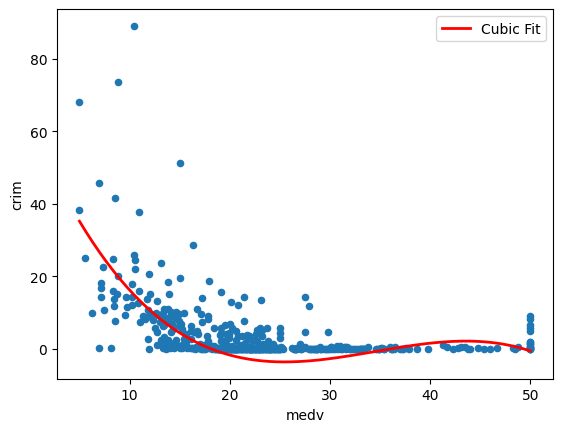

In [13]:
fig, ax = plt.subplots()

boston.plot.scatter("medv", "crim", ax=ax)

res = res_poly["medv"]

import numpy as np
medv_range = np.linspace(boston["medv"].min(), boston["medv"].max(), 200)

X_poly = MS([poly("medv", degree=3)]).fit_transform(pd.DataFrame({"medv": medv_range}))

crim_pred = res.predict(X_poly)

ax.plot(medv_range, crim_pred, color='red', linewidth=2, label='Cubic Fit')
ax.legend();

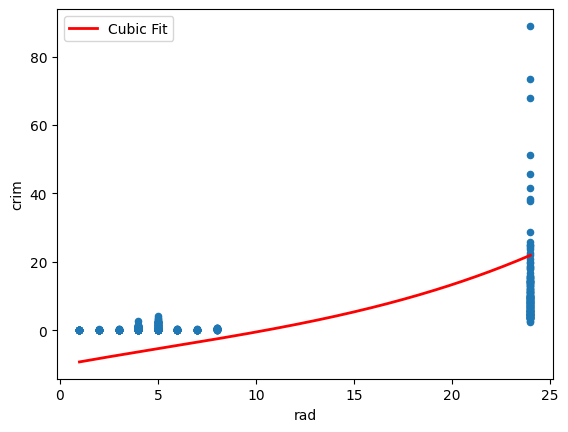

In [14]:
fig, ax = plt.subplots()

boston.plot.scatter("rad", "crim", ax=ax)

res = res_poly["rad"]

rad_range = np.linspace(boston["rad"].min(), boston["rad"].max(), 200)

X_poly = MS([poly("rad", degree=3)]).fit_transform(pd.DataFrame({"rad": rad_range}))

crim_pred = res.predict(X_poly)

ax.plot(rad_range, crim_pred, color='red', linewidth=2, label='Cubic Fit')
ax.legend();

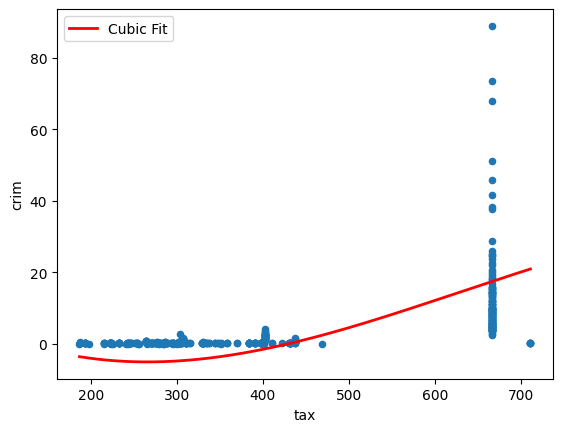

In [16]:
fig, ax = plt.subplots()

boston.plot.scatter("tax", "crim", ax=ax)

res = res_poly["tax"]

tax_range = np.linspace(boston["tax"].min(), boston["tax"].max(), 200)

X_poly = MS([poly("tax", degree=3)]).fit_transform(pd.DataFrame({"tax": tax_range}))

crim_pred = res.predict(X_poly)

ax.plot(tax_range, crim_pred, color='red', linewidth=2, label='Cubic Fit')
ax.legend();

As we can see from the plots, incorporating polynomial terms up to the third degree significantly improves the model’s ability to explain variability in the data, particularly for predictors like **medv**, **rad**, and **tax**. In the linear setting, these variables already demonstrated moderate explanatory power, but the cubic models reveal that their relationships with crime rate are more complex and nonlinear. For instance, **medv**'s $R^2$ nearly triples, indicating that the nonlinear terms capture important trends that a straight line cannot. Similarly, **rad** and **tax** benefit from the added flexibility, which helps account for sudden increases in crime rate at specific thresholds.